In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from support.hyperphoto import HyperPhoto
from support.plots import show_k, plot_cluster_means
from support.functions import kmeans

In [10]:
# פרמטרים מה-header
width = 800  # עמודות (x)
height = 280  # שורות (y)
bands = 126  # ערוצים (z)
source_path = r'C:\Users\ronsh\Desktop\big_data_for_projects\self_test_rad.img'
dtype = np.int16  # data type = 2
# פרמטרים לניתוח גרפים
range_ = (0, 1000)
bins = 500


add t

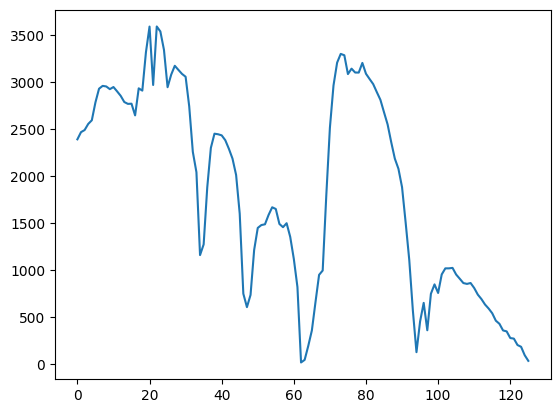

In [11]:
target = torch.load("../data/t.pt")
p = 0.01
x_values = np.arange(len(target.numpy()))
# plt.plot(x_values, target.numpy())
# הקוד שלך נשאר:


plt.plot(target.numpy(), )  # שים לב: זוהי הפקודה שהוחלפה מ-plt.stem
plt.show()

In [12]:
shape = (height, width, bands)
hyperPhoto = HyperPhoto(source_path, shape, np.int16,target= target)

In [13]:
hyperPhoto_t = HyperPhoto(data=(hyperPhoto.data + p * target),target= target)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

In [14]:
hyperPhoto.initial_statistics()
hyperPhoto_t.error8 = -hyperPhoto.data+hyperPhoto_t._neighbor8_mean(hyperPhoto_t.data)

init error
torch.Size([280, 800, 126])
init cov
torch.Size([126, 126])


In [15]:
hyperPhoto.r = hyperPhoto._compute_r(hyperPhoto.cov)
hyperPhoto_t.r  = hyperPhoto_t._compute_r(hyperPhoto.cov)
print(hyperPhoto.r)

tensor([[ -72.1725,  -16.5461,  -69.6363,  ...,  -15.2326,   -1.4747,
          -23.2908],
        [ -31.5113,    4.8521,   -2.0393,  ...,   -8.4982,  -13.2543,
          -26.7201],
        [ -81.2514,   15.0825,   43.3734,  ...,   -7.6248,    5.2457,
          -19.2841],
        ...,
        [  73.1128,   87.2921,   93.8498,  ...,   -6.8340,   -5.3923,
           -1.6108],
        [  89.0659,   55.7255,   32.1093,  ...,   -9.8509,   -0.7604,
            5.8443],
        [ -50.8519, -145.1396,  -77.0449,  ...,  -20.7365,   34.7751,
           35.0593]], dtype=torch.float64)


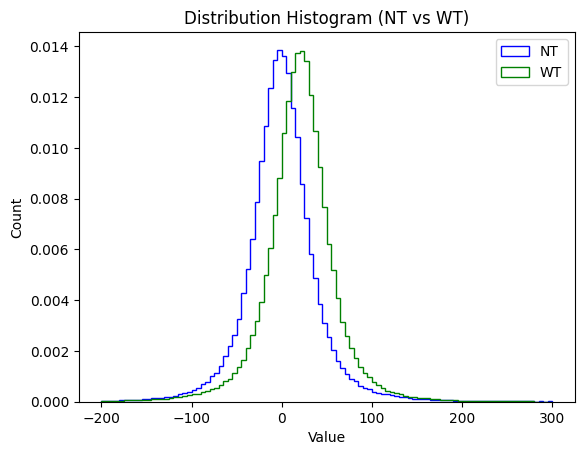

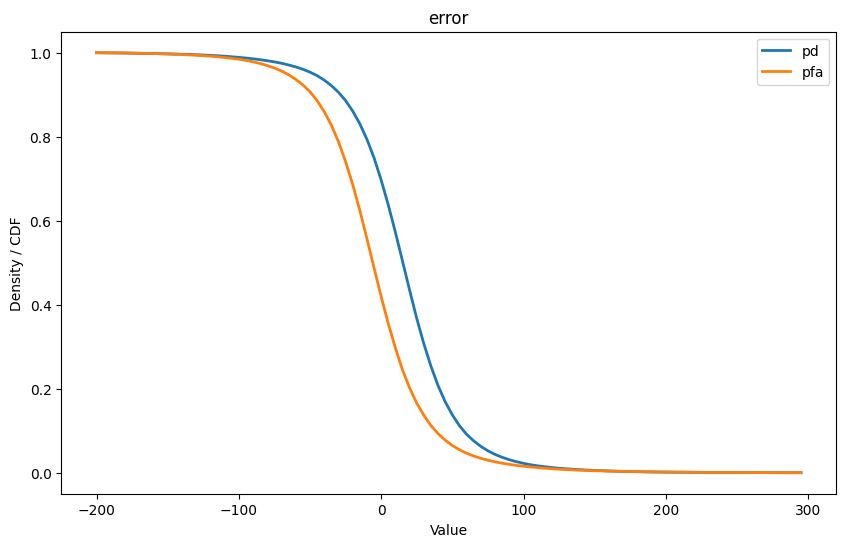

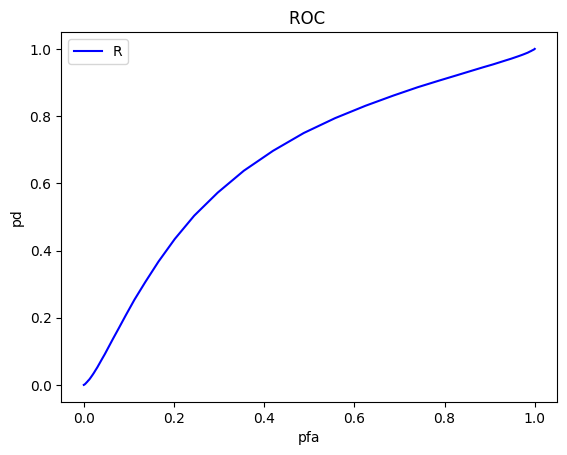

In [16]:
# היסטוגרמה 1 (NT - כחול): נצבע ונשים תווית NT ראשונה במקרא (כדי להתאים לתמונה)
# **שימו לב**: הסרנו את density=True
bins = 100
range_ = (-200,300)

wtd, bins1, _ = plt.hist(
    hyperPhoto.r.view(-1).numpy(),  # שימוש בנתוני NT
    bins=bins,
    range=range_,
    density=True,
    histtype='step',
    label='NT',  # הוספת התווית NT למקרא
    color='blue'  # צבע כחול
)

# היסטוגרמה 2 (WT - ירוק): נצבע ונשים תווית WT שנייה במקרא
# **שימו לב**: הסרנו את density=True
ntd, bins2, _ = plt.hist(
    hyperPhoto_t.r .view(-1).numpy(),  # שימוש בנתוני WT
    bins=bins,
    range=range_,
    density=True,
    histtype='step',
    label='WT',  # הוספת התווית WT למקרא
    color='green'  # צבע ירוק
)

# הגדרות הגרף
plt.legend()
plt.xlabel("Value")
plt.ylabel("Count")  # שינינו ל-Count כי הסרנו density=True
plt.title("Distribution Histogram (NT vs WT)")
plt.show()
plt.figure(figsize=(10, 6))

# Histogram 1

pd = -np.cumsum(ntd * np.diff(bins1)) + 1
plt.plot(bins1[:-1], pd, linewidth=2, label='pd')

# Histogram 2
pfa = -np.cumsum(wtd * np.diff(bins2)) + 1
plt.plot(bins2[:-1], pfa, linewidth=2, label='pfa')

plt.xlabel("Value")
plt.ylabel("Density / CDF")
plt.title("error")
plt.legend()
plt.show()
n_ = 0
for n in range(len(pfa)):
    if pfa[n] < 1:
        n_ = n
        break

plt.plot(pfa[n_:], pd[n_:], label="R", color='blue')


plt.xlabel("pfa")
plt.ylabel("pd")
plt.title("ROC ")
plt.legend()
plt.show()